In [1]:
from google.colab import files
uploaded = files.upload()

Saving news.csv to news.csv


In [2]:
#import modules
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('news.csv')
display(df.head())
df.shape

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


(6335, 4)

In [5]:
#DataFlair - Get the labels
labels=df['label']
labels.head()

,label
0,FAKE
1,FAKE
2,REAL
3,FAKE
4,REAL


In [7]:
#Spliting the dataset
X_train,X_test,y_train,y_test = train_test_split(df['text'],labels,test_size=0.2,train_size=0.8,random_state=41)

In [10]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [11]:
#DataFlair - Initialize a PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter=50)

#DataFlair - Fit the model
model.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred = model.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
display(f'Accuracy: {round(score*100,2)}%')

'Accuracy: 94.79%'

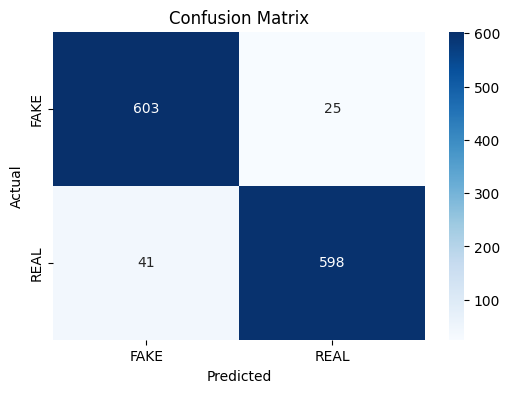

In [12]:
#DataFlair - Calculate the confusion matrix
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

#DataFlair - Visualise the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()